In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("gbm-data.csv")
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
target = data['Activity']
data.drop('Activity', axis = 1, inplace = True)

In [4]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                      test_size=0.8, 
                                      random_state=241)

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

In [6]:
learning_rates = [1, 0.5, 0.3, 0.2, 0.1] 
results = {}
for learning_rate in learning_rates:
    clf = GradientBoostingClassifier(n_estimators=250, learning_rate=learning_rate, verbose = True, random_state=241)
    clf.fit(X_train, y_train)
    scores_train_raw = clf.staged_predict_proba(X_train)
    scores_test_raw  = clf.staged_predict_proba(X_test)
    scores_test = []
    scores_train = []
    for i,scores in enumerate(scores_test_raw):
        ll = log_loss(y_test, scores[:,1])
        scores_test.append({'n_iter' : i, 'log_loss' : ll})
        
    for i,scores in enumerate(scores_train_raw):
        ll = log_loss(y_train, scores[:,1])
        scores_train.append({'n_iter' : i, 'log_loss' : ll})
    
    results[learning_rate] = {'scores_test' : scores_test, 'scores_train' : scores_train}
    

      Iter       Train Loss   Remaining Time 
         1           1.0190            1.10m
         2           0.9192           55.30s
         3           0.8272           48.25s
         4           0.7834           44.90s
         5           0.7109           43.14s
         6           0.6368           42.23s
         7           0.5797           41.53s
         8           0.5610           40.35s
         9           0.5185           40.39s
        10           0.4984           40.22s
        20           0.1999           36.39s
        30           0.1313           33.54s
        40           0.0790           32.16s
        50           0.0511           30.67s
        60           0.0352           28.77s
        70           0.0245           27.19s
        80           0.0162           25.64s
        90           0.0114           23.99s
       100           0.0077           22.62s
       200           0.0004            6.74s
      Iter       Train Loss   Remaining Time 
        

KeyboardInterrupt: 

# Charts log_loss | Learning rate = 0.3

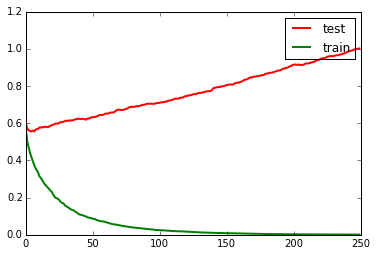

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot([x['log_loss'] for x in results[0.5]['scores_test']], 'r', linewidth=2)
plt.plot([x['log_loss'] for x in results[0.5]['scores_train']], 'g', linewidth=2)
plt.legend(['test', 'train'])

In [44]:
res = results[0.2]

In [45]:
best = reduce(lambda a,b : a if a['log_loss'] < b['log_loss'] else b, res['scores_test'])

In [53]:
print best
print '%.2f' % best['log_loss']

{'log_loss': 0.52971571631359193, 'n_iter': 36}
0.53


In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier( random_state=241, n_estimators=36)

In [56]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=36, n_jobs=1,
            oob_score=False, random_state=241, verbose=0)

In [57]:
preds = rf.predict_proba(X_test)

In [58]:
print '%.2f' % log_loss(y_test, preds)

0.54
